# COGS 108 - Final Project 

# Overview

*Fill in your overview here*

# Name & GitHub ID

- Name: Samuel Redman
- GitHub Username: SamuelRedman

# Research Question

*Fill in your research question here*

## Background and Prior Work

Since this project deals with language describing COVID-19, as well as numerical rankings associated with the review of locations in San Diego, a glossary was necessary to have appropriate terminology to identify reviews containing information regarding COVID-19

References (include links):
- 1) https://www.yalemedicine.org/news/covid-19-glossary
- 2)

# Hypothesis


Is there a relationship between COVID-19 terms used in a Yelp review and review ratings for locations within San Diego County? 

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name: yelp_SD_reviews.csv
- Link to the dataset: https://github.com/COGS108/individual_fa20/blob/master/data/yelp_SD_reviews.csv
- Number of observations: 3 (id, rating, text)

- Dataset Name: yelp_SD_parks.csv
- Link to the dataset: https://github.com/COGS108/individual_fa20/blob/master/data/yelp_SD_parks.csv
- Number of observations: 10 (number of columns?)

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
from numpy import median

pd.set_option('display.expand_frame_repr', False)

sns.set()
sns.set_context('talk')
warnings.filterwarnings('ignore')

key_terms = ['coronavirus','covid','sars','epidemic','outbreak','pandemic','transmission','asymptomatic','social distance',
            'social distancing','social distanced','shelter-in-place','shelter in place','isolation','isolating',
            'test','mask','respirator','vaccine']


# Data Cleaning

The file for yelp information is already very clean and succinct. The only changes I made to the file is changing the 'review' column to lower case so that the key_terms list can be easily compared without need to have duplicate values for a variety of casings. 

In [75]:
# can later change this to just the file name , just python interpreter doesn't know
df = pd.read_csv('C:/Users/Sam/PycharmProjects/individual_fa20/final_project/yelp_SD_reviews.csv', dtype=str)
df.columns = ['id', 'rating', 'review']
df['review'] = df['review'].str.lower()
df_with_keywords = df[df['review'].str.contains('|'.join(key_terms))]



combined_ratings_df = pd.concat([pd.Series(df['rating']).value_counts(), pd.Series(df_with_keywords['rating']).value_counts()], axis=1)
combined_ratings_df.columns = ['Without Keywords', 'With Keywords']
combined_ratings_df = combined_ratings_df.reset_index().melt(id_vars='index')
combined_ratings_df.pivot(index='index', columns= 'variable', values='value')
combined_ratings_df.sort_values(by=['index'],inplace=True)




# Data Analysis & Results

Include cells that describe the steps in your data analysis.

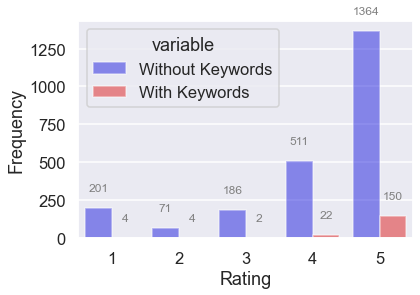

In [77]:
fig = sns.barplot(x ='index',
                  y = 'value',
                  hue = 'variable',
                  data = combined_ratings_df,
                  palette=['blue', 'red'],
                  alpha = 0.5,
                  )
# graph formatting
plt.xlabel('Rating')
plt.ylabel('Frequency')

# annotation of exact count/frequency of bar for better clarity
ax = fig
for p in ax.patches:
    ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='center', fontsize=12, color='gray', xytext=(0, 20),
                 textcoords='offset points') 


# Ethics & Privacy

Yelp data is public, and while users' names are available in-app and on their website, this data does not contain information pertaining to individual people's identities. As this is the case, I believe that it is very ethical.

# Conclusion & Discussion

*Fill in your discussion information here*